In [34]:
import numpy as np
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from IPython.display import display
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
%matplotlib inline  
from sklearnex import patch_sklearn
patch_sklearn()
plt.rcParams['figure.dpi'] = 400

plt.style.use('science')

def plot_feature_importance_comparison(models, X_test, y_test, colors=None,coefs = None):
    # Dictionary to store feature importance results
    fi_results = {}

    for model_name, model in models.items():
        fi = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42,n_jobs=-1)
        fi_results[model_name] = fi.importances_mean

    # Extract feature names
    feature_names = list(X_test.columns)

    # Create a DataFrame for feature importance results
    importance_df = pd.DataFrame(fi_results, index=feature_names)
    with plt.style.context('science'):
        # Plot grouped bar chart
        fig, ax = plt.subplots(figsize=(8, 3))
        bar_width = 0.05
        bar_positions = np.arange(len(feature_names))

        for i, (model, importance) in enumerate(importance_df.items()):
            color = colors[i] if colors is not None else None
            ax.bar(bar_positions + (i * bar_width), importance, width=bar_width, label=model, color=color)

        # Add labels, title, and legend
        ax.set_xticks(bar_positions + 2.5 * bar_width)
        ax.set_xticklabels(feature_names, rotation=45, ha='right',fontsize = 'x-small')
        ax.set_ylabel('Importance')
        # Shrink current axis's height by 10% on the bottom
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
                        box.width, box.height * 0.9])

        # Put a legend below current axis
        ax.legend(fancybox=True, shadow=False, ncol=1,fontsize = 'x-small')
        plt.show()
        
def plot_feature_classification_error(models, X, y, colors=None, cv=5, random_state=123):
    # Dictionary to store feature importance results
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)
    mean_error = {}
    model_names = []
    
    for model_name, model in models.items():
        cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy',n_jobs=-1)
        mean_error[model_name] = np.mean(cross_val_scores)  # Classification error
        model_names.append(model_name)
        
    with plt.style.context('science'):
        # Plot grouped bar chart
        fig, ax = plt.subplots(figsize=(6, 2))
        bar_width = 0.1
        plt.xlim(0, 1) 
        plt.barh(model_names, mean_error.values(), color=colors)
        plt.xlabel('5-fold cv accuracy')
        plt.show()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [5]:
# Load libraries
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("./datasets/diabetes.csv")
y = df["Outcome"]
X = df.drop('Outcome',axis=1)
display(X.columns)
X_train, X_test, y_train, y_test =train_test_split(X,y,
                                                   shuffle=True,
                                                   test_size=0.25,
                                                   random_state=42,
                                                   stratify=df['Outcome'])

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train,y_train)
preds_lr = lr_model.predict(X_test)
print(lr_model.coef_[0])
print("The test accuracy score of logistic regression is ",
      accuracy_score(y_test, preds_lr), f1_score(y_test, preds_lr, average='macro'))


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
preds_rf = rf_model.predict(X_test)
print("The test accuracy score of Decision Tree is ",
      accuracy_score(y_test, preds_rf), f1_score(y_test, preds_rf, average='macro'))


xgb_model = xgboost.XGBClassifier(n_estimators=100, random_state=1)
xgb_model.fit(X_train,y_train)
preds_xgb = xgb_model.predict(X_test)
print("The test accuracy score of XGBoost is ",
      accuracy_score(y_test, preds_xgb), f1_score(y_test, preds_xgb, average='macro'))
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
preds_knn = knn_model.predict(X_test)
print("The test accuracy score of knn is ",
      accuracy_score(y_test, preds_knn), f1_score(y_test, preds_knn, average='macro'))

# instantiating the object and fitting
svm_model = SVC(kernel='rbf', random_state=42).fit(X_train, y_train)

# predicting the values
y_pred_svm = svm_model.predict(X_test)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train,y_train)
preds_lr = lr_model.predict(X_test)

mlp_reg = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42)
mlp_reg.fit(X_train, y_train)
preds_mlp = mlp_reg.predict(X_test)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

[ 1.32026231e-01  3.56555402e-02 -1.13647480e-02 -3.36167306e-04
 -7.86817725e-04  9.46927189e-02  6.57649954e-01  1.28403970e-02]
The test accuracy score of logistic regression is  0.7291666666666666 0.6876486046802652
The test accuracy score of Decision Tree is  0.7708333333333334 0.735702665498686
The test accuracy score of XGBoost is  0.734375 0.7045529976163896
The test accuracy score of knn is  0.6927083333333334 0.6471357817026446


c:\Users\versu\anaconda3\envs\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


c:\Users\versu\anaconda3\envs\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\versu\anaconda3\envs\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\versu\anaconda3\envs\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\versu\anaconda3\envs\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\versu\anaconda3\envs\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\versu\

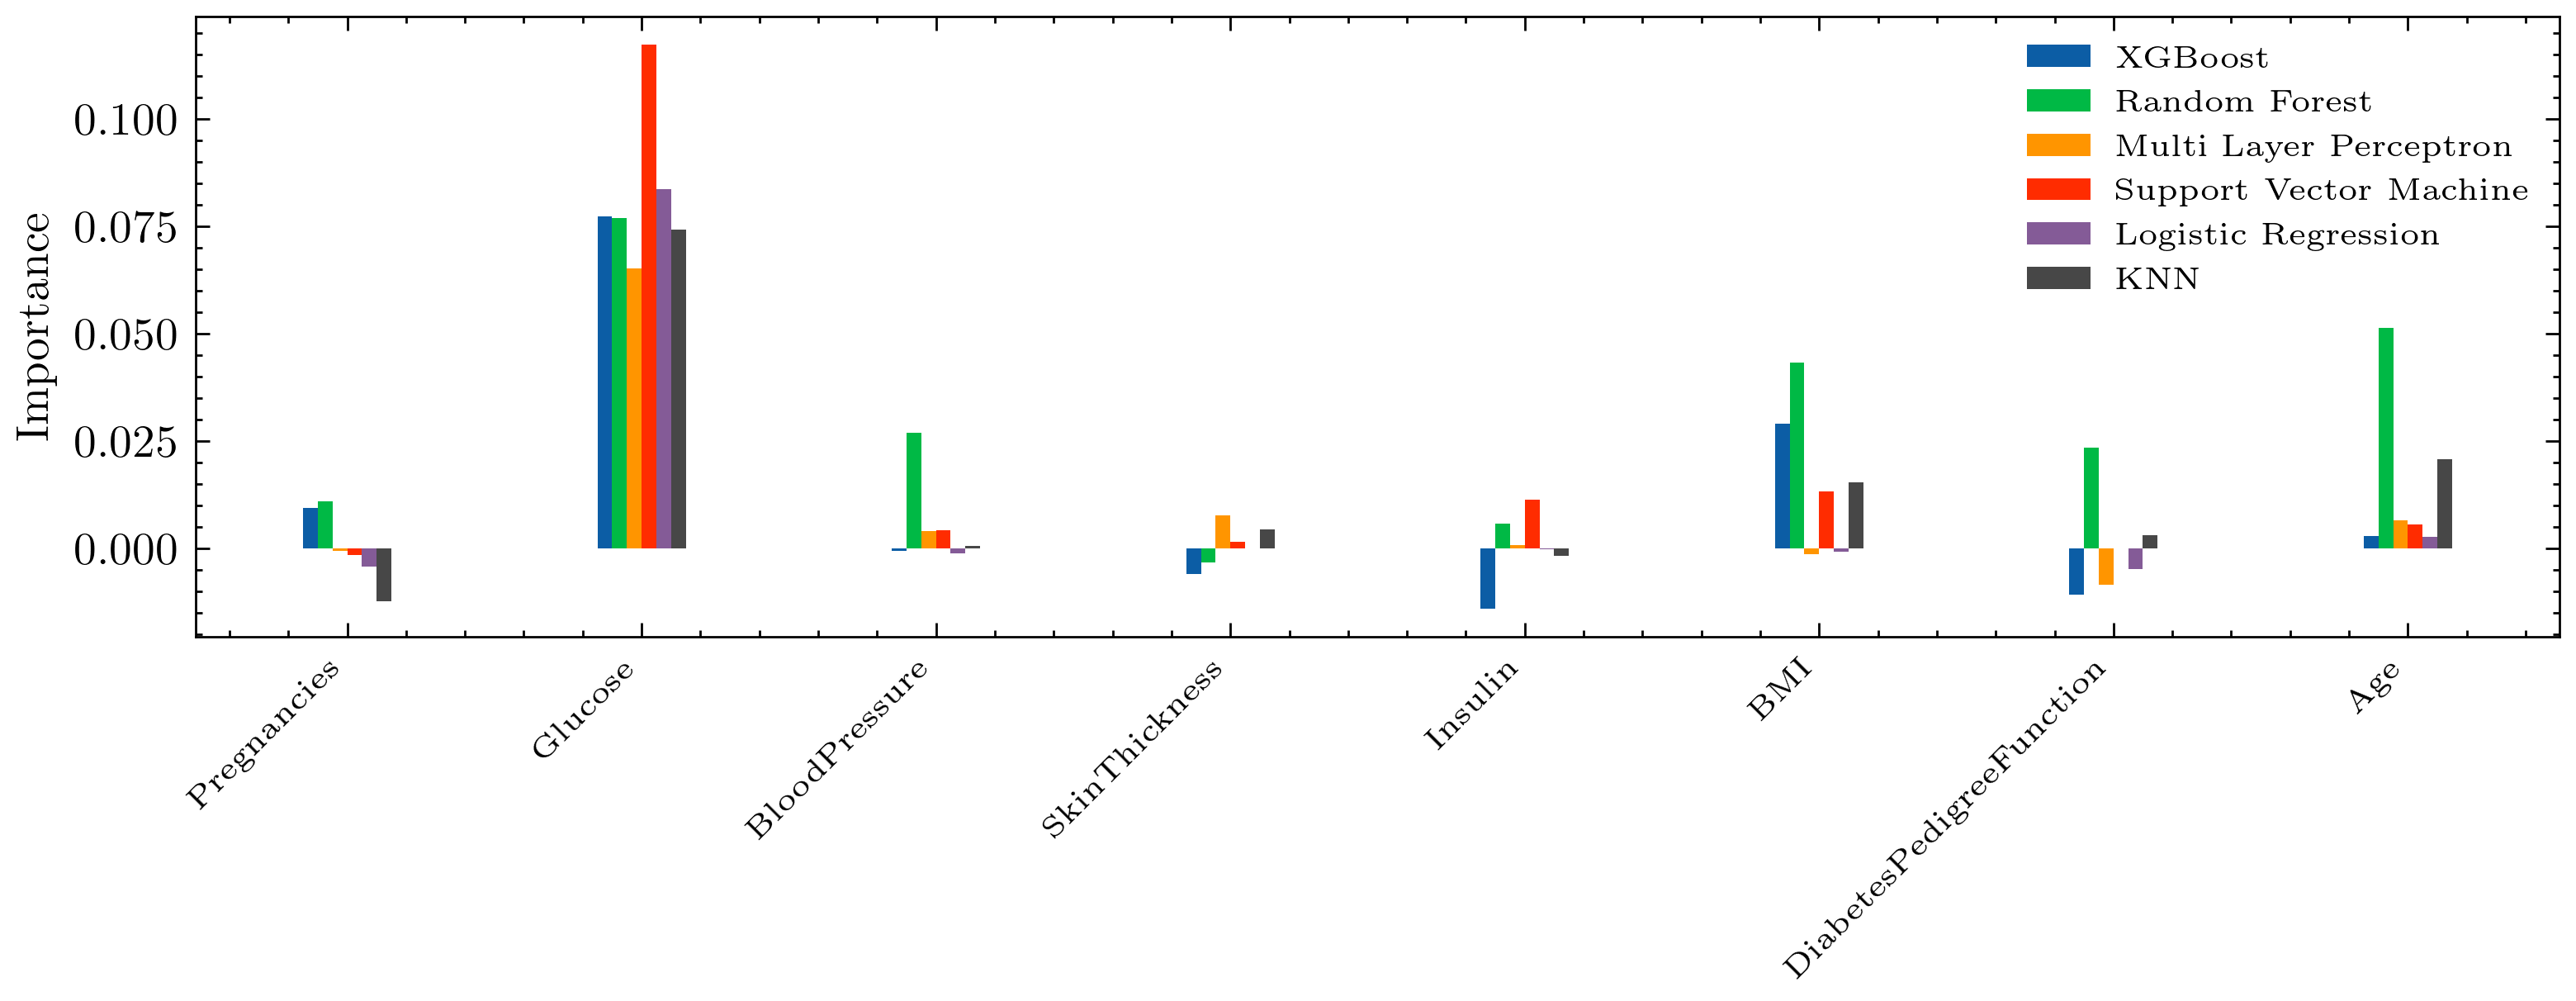

c:\Users\versu\anaconda3\envs\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\versu\anaconda3\envs\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\versu\anaconda3\envs\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\versu\anaconda3\envs\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\versu\anaconda3\envs\env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\versu\

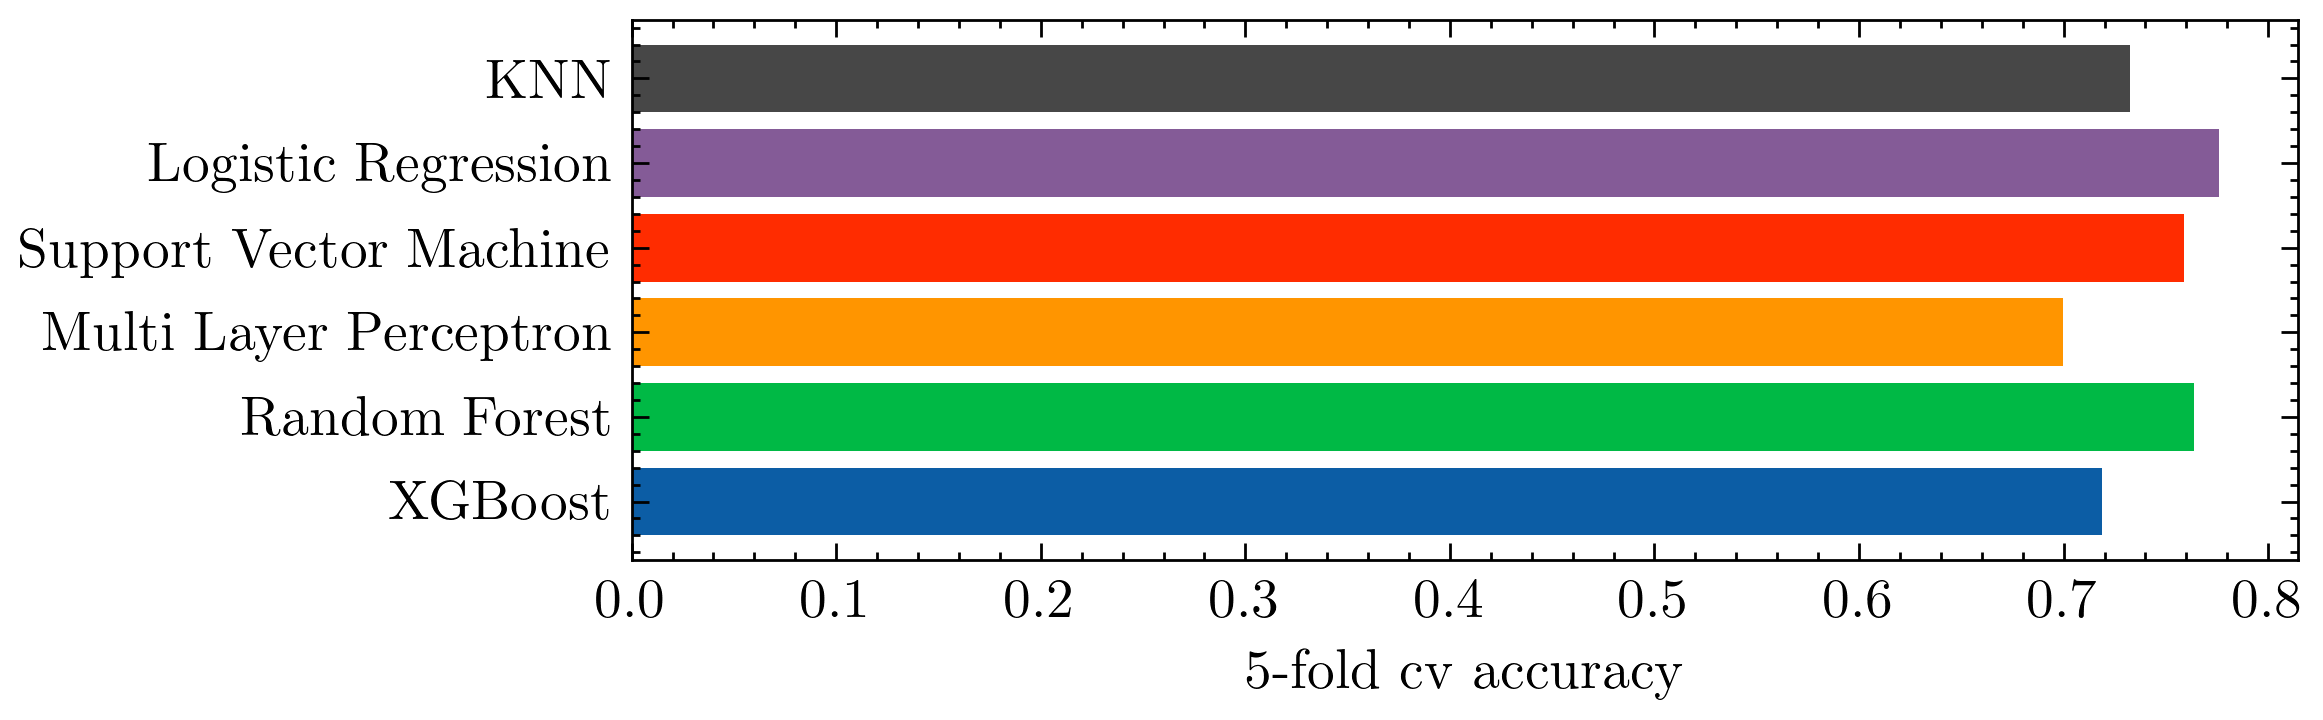

In [60]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
num_colors = 10
custom_colors = color_cycle[:num_colors]
models = {
    'XGBoost': xgb_model,
    'Random Forest': rf_model,
    'Multi Layer Perceptron': mlp_reg,
    'Support Vector Machine': svm_model,
    "Logistic Regression":lr_model,
    "KNN":knn_model,
}

plot_feature_importance_comparison(models, X_test, y_test, colors=custom_colors)
plot_feature_classification_error(models,X_train,y_train,custom_colors)

In [36]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import make_pipeline
svm_model = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear')
)
svm_model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [55]:
%%capture
from sklearn.inspection import PartialDependenceDisplay
my_plot = None
with plt.style.context('science'):
    fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(10, 3))  # (rows, columns, index)
    lr_disp = PartialDependenceDisplay.from_estimator(lr_model, X_train, features=[0,1,2,3,4,5,6,7],feature_names=X_train.columns)
    xgb_disp = PartialDependenceDisplay.from_estimator(xgb_model, X_train, features=[0,1,2,3,4,5,6,7],feature_names=X_train.columns)
    rf_disp = PartialDependenceDisplay.from_estimator(rf_model, X_train, features=[0,1,2,3,4,5,6,7],feature_names=X_train.columns)
    mlrp_disp = PartialDependenceDisplay.from_estimator(mlp_reg, X_train, features=[0,1,2,3,4,5,6,7],feature_names=X_train.columns)
    svm_disp = PartialDependenceDisplay.from_estimator(svm_model, X_train, features=[0,1,2,3,4,5,6,7],feature_names=X_train.columns)
    knn_disp = PartialDependenceDisplay.from_estimator(knn_model, X_train, features=[0,1,2,3,4,5,6,7],feature_names=X_train.columns)
    x_vals = np.linspace(-2, 2, 1000)
    lr_disp.plot(ax=[ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8], line_kw={"label": "LR","color":custom_colors[4]})
    xgb_disp.plot(ax=[ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8], line_kw={"label": "xgboost","color":custom_colors[0]})
    rf_disp.plot(ax=[ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8], line_kw={"label": "random forest","color":custom_colors[1]})
    mlrp_disp.plot(ax=[ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8], line_kw={"label": "NN","color":custom_colors[2]})
    knn_disp.plot(ax=[ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8], line_kw={"label": "NN","color":custom_colors[5]})
    # svm_disp.plot(ax=[ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8], line_kw={"label": "SVM","color":custom_colors[3]})
    for ax in [ax1, ax2, ax3, ax4,ax5,ax6,ax7,ax8]:
        ax.get_legend().remove()
        ax.set_ylabel('')  
        ax.set_ylim([0,1])
    for ax in [ax2, ax3, ax4,ax6,ax7,ax8]:
        ax.set_yticks([])
    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
        return unique
    lines_labels = legend_without_duplicate_labels(ax1)
    lines, labels = zip(*lines_labels)
    lines = list(lines)
    labels = list(labels)
    fig.set_tight_layout(True)
    my_plot = fig

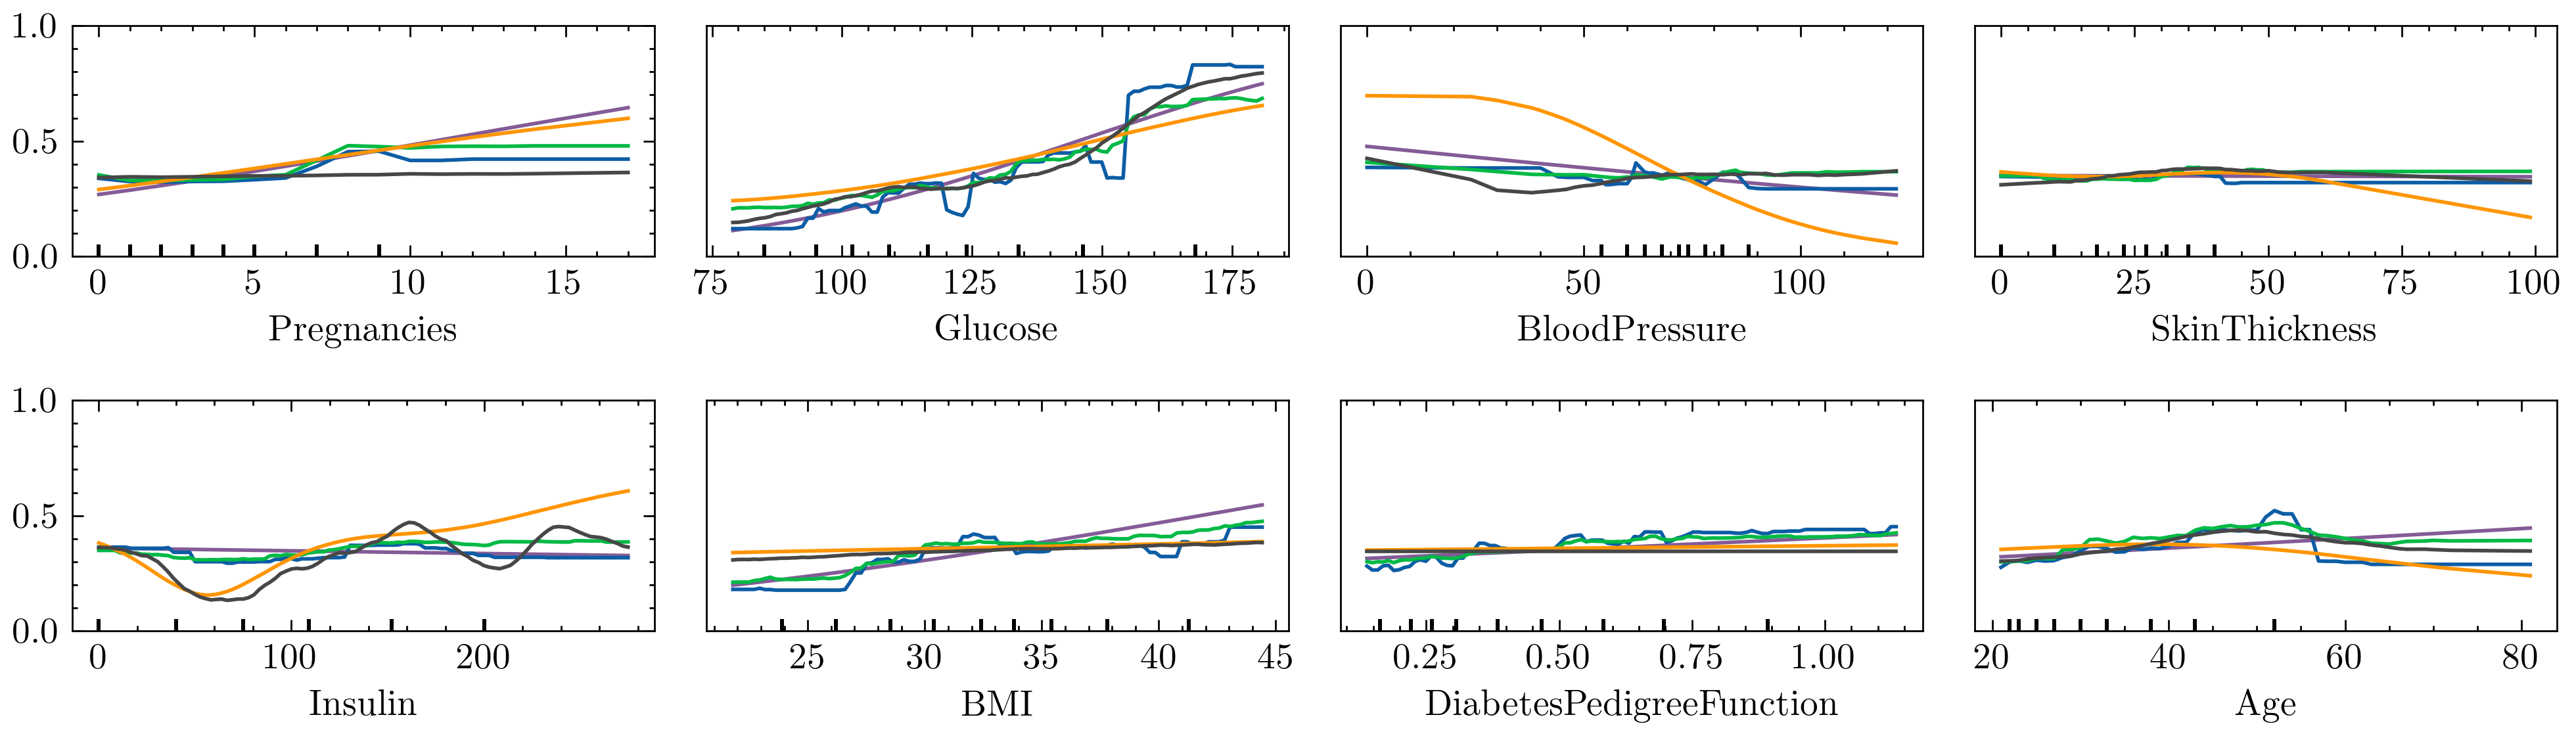

In [56]:
display(my_plot)

In [22]:
y_pred_svm = svm_model.predict(X_test)
display(y_pred_svm)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
from sklearn.calibration import LabelEncoder


dataset =  pd.read_csv("./datasets/adult.csv")
# Replace All Null Data in NaN
le= LabelEncoder()
dataset['income'] = np.where(dataset['income'] == '<=50K', 0, 1)
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

# Fill Missing Category Entries
dataset["workclass"] = dataset["workclass"].fillna("X")
dataset["occupation"] = dataset["occupation"].fillna("X")
dataset["native.country"] = dataset["native.country"].fillna("United-States")

# Create Married Column - Binary Yes(1) or No(0)
dataset["marital.status"] = dataset["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital.status"] = dataset["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')


# dataset.drop(labels=["workclass","education","occupation","relationship","race","native_country"], axis = 1, inplace = True)
edu_map = dataset[['education','education.num']].drop_duplicates()
dataset.drop(labels=["education", 'native.country',"relationship"], axis = 1, inplace = True)
sex_le = LabelEncoder()
dataset['sex'] = sex_le.fit_transform(dataset['sex'])
marital_le = LabelEncoder()
dataset['marital.status'] = marital_le.fit_transform(dataset['marital.status'])
X = dataset.drop(columns='income')
Y = dataset['income']
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state =123)
print(dataset.shape)


(32561, 12)


In [25]:
display(X_train)

,age,workclass,fnlwgt,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week
17064,20,Private,110998,10,1,Adm-clerical,Asian-Pac-Islander,0,0,0,30
18434,22,Private,263670,9,1,Other-service,Black,1,0,0,80
3294,51,Private,335997,9,0,Exec-managerial,White,1,4386,0,55
31317,53,Private,111939,13,0,Other-service,White,1,0,0,35
4770,52,Self-emp-inc,51048,13,0,Sales,White,1,0,0,55
...,...,...,...,...,...,...,...,...,...,...,...
28636,48,Private,70668,9,0,Machine-op-inspct,White,0,0,0,50
17730,35,Private,340018,6,1,Other-service,Black,0,0,0,38
28030,26,Private,373553,10,0,Adm-clerical,White,0,0,0,42
15725,28,Private,155621,3,1,Craft-repair,White,1,0,0,40


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
columns_to_scale = ['fnlwgt', 'education.num', 'age','capital.gain', 'capital.loss', 'hours.per.week'] 
categorical_cols = ['workclass', 'occupation',  'race']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='error',drop='first'))])
lr_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), columns_to_scale),('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('classifier', LogisticRegression(random_state=42,max_iter=2000))
])
lr_model.fit(X_train,y_train)
preds_lr = lr_model.predict(X_test)
print("The test accuracy score of logistic regression is ",
      accuracy_score(y_test, preds_lr), f1_score(y_test, preds_lr, average='weighted'))

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='error'))])
rf_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), columns_to_scale),('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('classifier',RandomForestClassifier(random_state=42))
])
rf_model.fit(X_train,y_train)
preds_rf = rf_model.predict(X_test)
print("The test accuracy score of Decision Tree is ",
      accuracy_score(y_test, preds_rf), f1_score(y_test, preds_rf, average='weighted'))


xgb_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), columns_to_scale),('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('classifier',xgboost.XGBClassifier(n_estimators=100, random_state=42))
])
xgb_model.fit(X_train,y_train)
preds_xgb = xgb_model.predict(X_test)
print("The test accuracy score of XGBoost is ",
      accuracy_score(y_test, preds_xgb), f1_score(y_test, preds_xgb, average='weighted'))

mlp_reg = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), columns_to_scale),('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('classifier',MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42))
])
mlp_reg.fit(X_train, y_train)
preds_mlp = mlp_reg.predict(X_test)
print("The test accuracy score of MLP is ",
      accuracy_score(y_test, preds_mlp), f1_score(y_test, preds_mlp, average='weighted'))

The test accuracy score of logistic regression is  0.8464609243052357 0.8398772750301303
The test accuracy score of Decision Tree is  0.8509135575003839 0.8454490322791566
The test accuracy score of XGBoost is  0.8685705512052817 0.863734577162863
The test accuracy score of MLP is  0.8427759864885613 0.8414709265919659


In [30]:
svm_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), columns_to_scale),('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('classifier',MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42))
])
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("The test accuracy score of SVM is ",
      accuracy_score(y_test, y_pred_svm), f1_score(y_test, y_pred_svm, average='weighted'))

The test accuracy score of SVM is  0.8427759864885613 0.8414709265919659


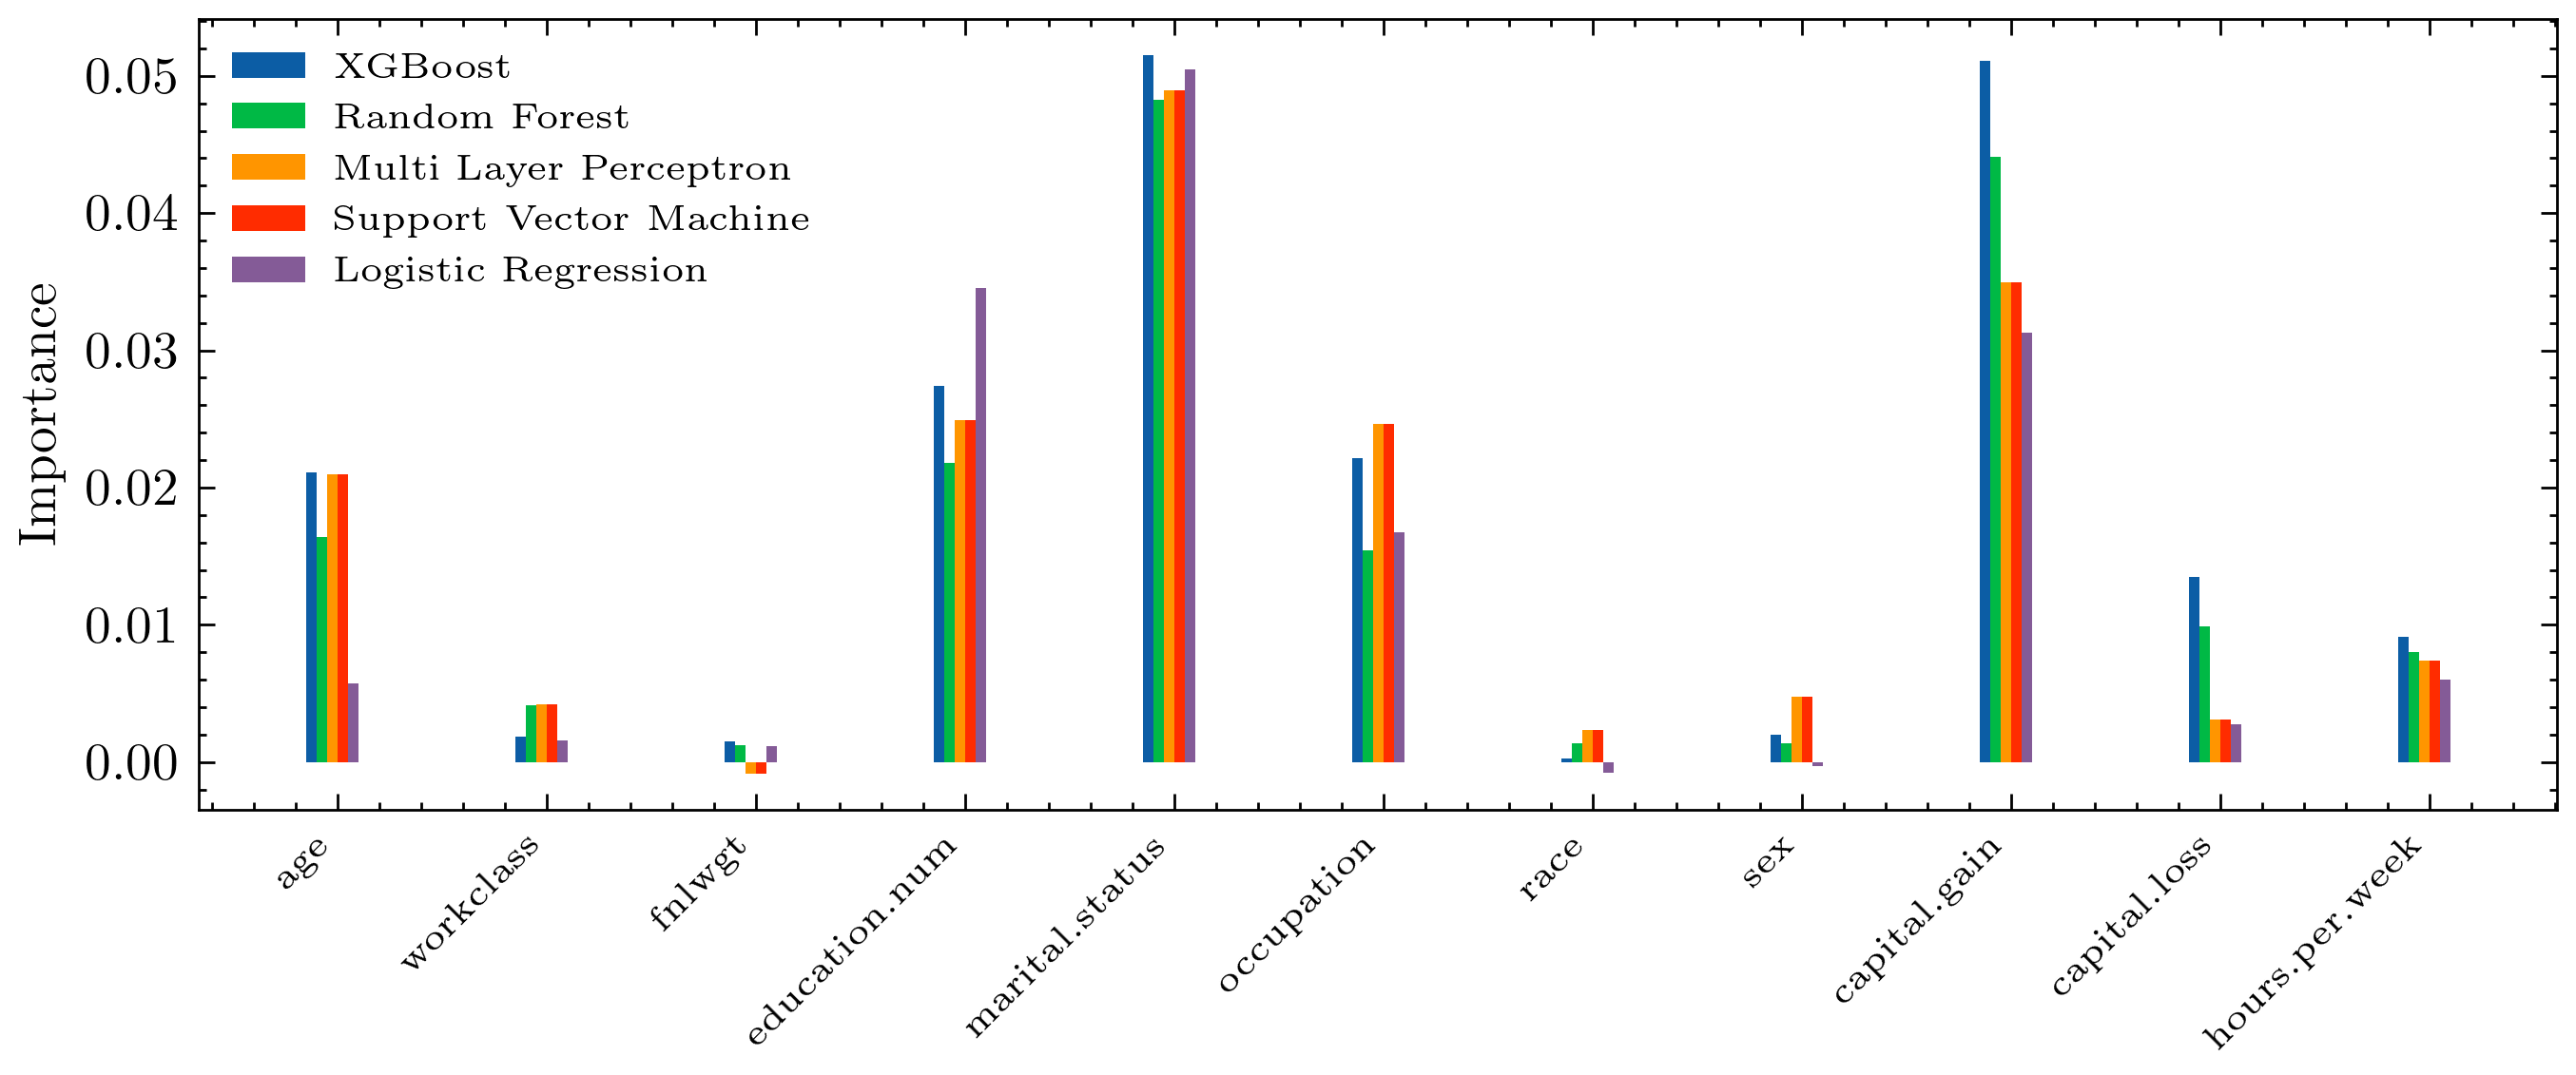

In [31]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
num_colors = 10
custom_colors = color_cycle[:num_colors]
models = {
    'XGBoost': xgb_model,
    'Random Forest': rf_model,
    'Multi Layer Perceptron': mlp_reg,
    'Support Vector Machine': svm_model,
    "Logistic Regression":lr_model,
}

plot_feature_importance_comparison(models, X_test, y_test, colors=custom_colors)


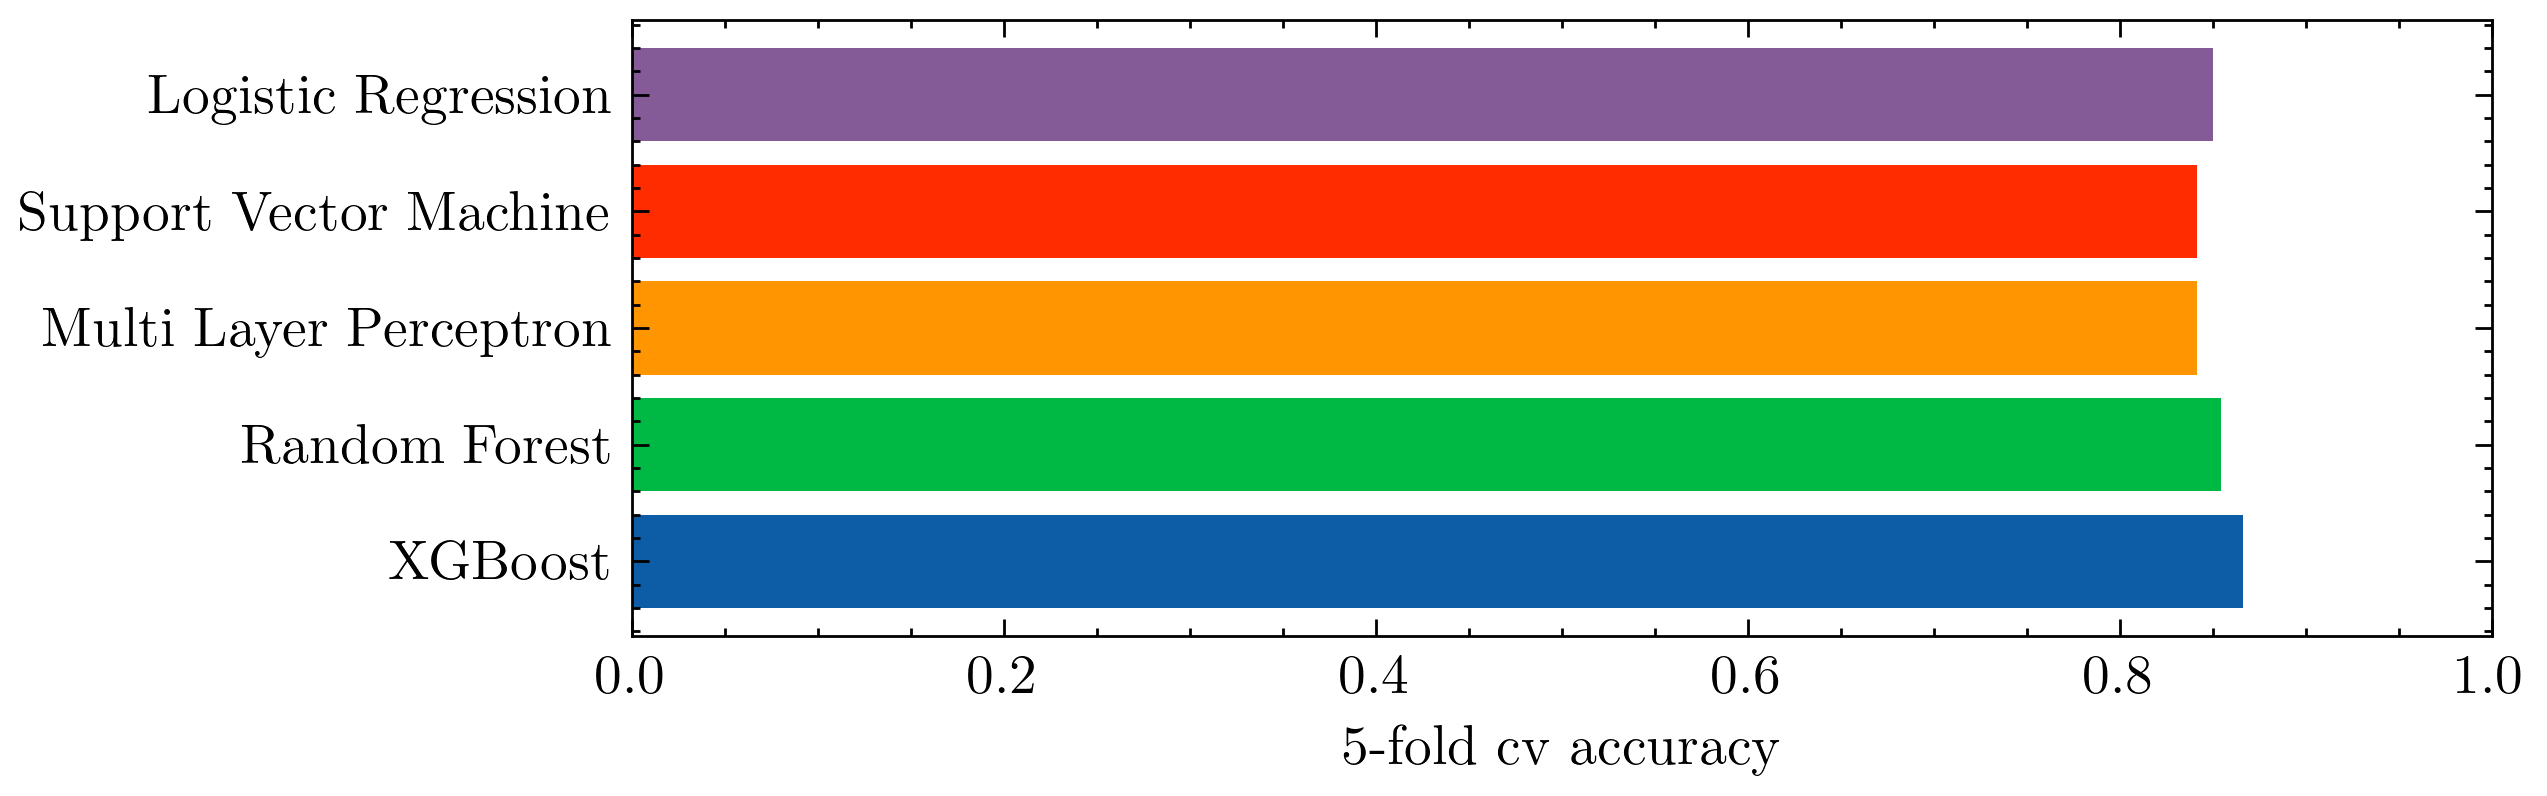

In [35]:
plot_feature_classification_error(models,X_train,y_train,custom_colors)
